In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**GETTING THEM INTO THE FIELD**

In [5]:
twit = pd.read_csv(r'G:\Programming\Prodigy_DS\twitter_training.csv',header=None)
twit.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [9]:
twit.shape

(74682, 4)

In [11]:
twit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       74682 non-null  int64 
 1   1       74682 non-null  object
 2   2       74682 non-null  object
 3   3       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [39]:
twit.columns = ['id', 'entity', 'sentiment', 'text']

**THROWING OUT ALL DE PUNTUATIONS**

In [42]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [44]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [50]:
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r"http\S+|@\S+|#\S+", "", text)  # remove URLs, mentions, hashtags
    text = re.sub(r"[^A-Za-z\s]", "", text)       # remove special characters
    text = text.lower()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

In [52]:
twit['clean_text'] = twit['text'].apply(clean_text)

**NOW PERFORMING SENTIMENT ANALYSIS**

In [55]:
twit['sentiment'].value_counts()

sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

**VISUALIZING PART**

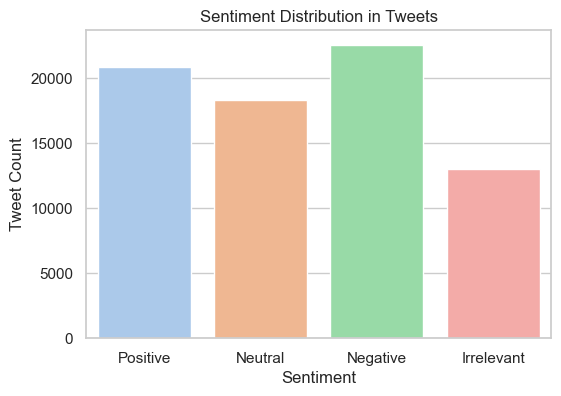

In [60]:
plt.figure(figsize=(6, 4))
sns.countplot(data=twit, x='sentiment', hue='sentiment', palette='pastel', legend=False)
plt.title('Sentiment Distribution in Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.show()

The Negative sentiment bar is taller than both Positive and Neutral, indicating that a majority of the tweets express dissatisfaction, criticism, or concern regarding the topic/brand.

In [67]:
!pip install wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.2 kB 262.6 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/301.2 kB 363.1 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/301.2 kB 599.1 kB/s eta 0:00:01
   ------------------------ ------------- 194.6/301.2 kB 784.3 kB/s eta 0:00:01
   ---------------------------- --------- 225.3/301.2 kB 915.1 kB/s eta 0:00:01
   ---------------------------- --------- 225.3/301.2 kB 915.1 kB/s eta 0:00:01
   -------------------------------------- 301.2/301.2 kB 775.9 kB/s eta 0:00:00


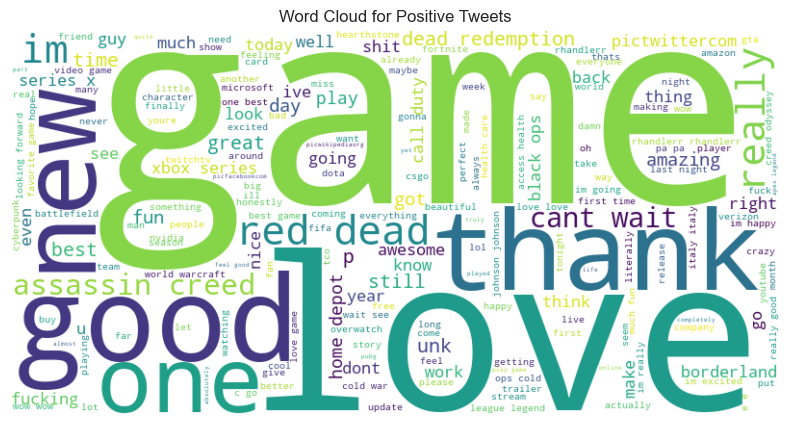

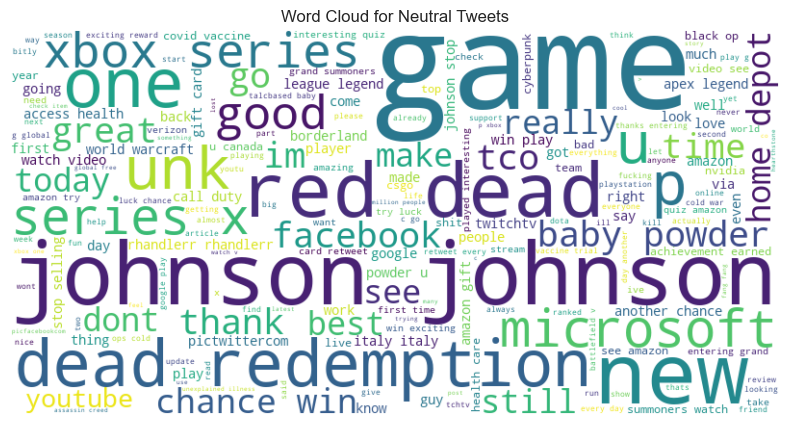

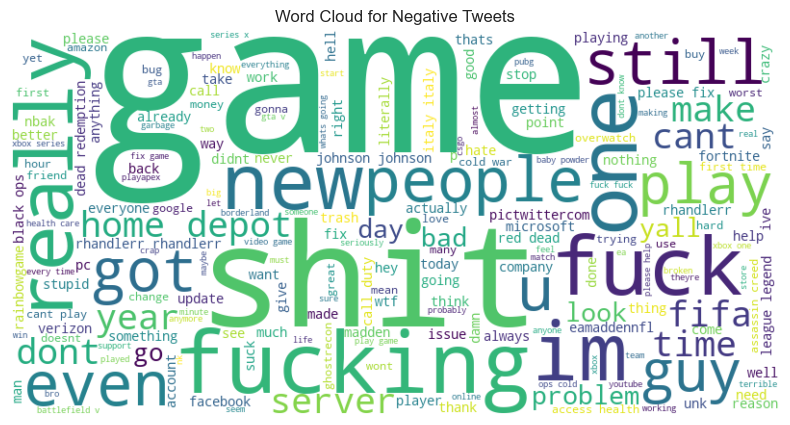

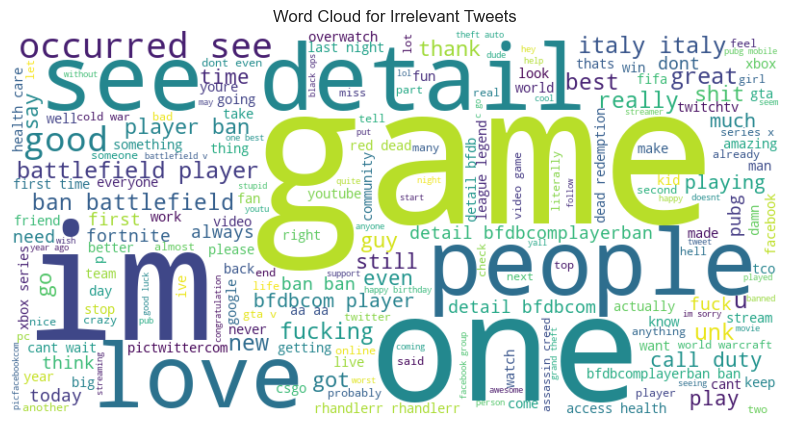

In [69]:
from wordcloud import WordCloud

# Generate word clouds for each sentiment category
for sentiment in twit['sentiment'].unique():
    subset = twit[twit['sentiment'] == sentiment]
    text = " ".join(subset['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Tweets')
    plt.show()

In [75]:
from collections import Counter

def get_top_words(sentiment, n=10):
    text = " ".join(twit[twit['sentiment'] == sentiment]['clean_text'])
    words = text.split()
    common_words = Counter(words).most_common(n)
    return pd.DataFrame(common_words, columns=['Word', 'Frequency'])

get_top_words('Positive')

,Word,Frequency
0,game,3115
1,love,1801
2,im,1770
3,good,1617
4,like,1371
5,really,1290
6,new,1199
7,time,1141
8,play,1119
9,best,1112


In [77]:
get_top_words('Negative')

,Word,Frequency
0,game,4506
1,get,1829
2,like,1629
3,shit,1530
4,im,1425
5,fix,1325
6,fuck,1291
7,play,1241
8,cant,1229
9,dont,1127


In [79]:
get_top_words('Neutral')

,Word,Frequency
0,johnson,1811
1,game,1617
2,amazon,1117
3,get,1011
4,like,946
5,u,921
6,im,891
7,one,879
8,play,850
9,new,850


SUMMARY:
Sentiment analysis of social media data reveals a significantly high proportion of negative tweets compared to neutral and positive ones. This indicates a predominantly unfavorable public opinion toward the topic or brand. Further investigation into negative tweet content is recommended to understand root causes and address public concerns